In [52]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches as patches

%matplotlib inline

np.random.seed(123)

In [22]:
def init_som(x, y, n):
    """
    Initialize three-dimensional matrix x*y*n.
    :param x: map height
    :param y: map width
    :param n: number of features in input
    """
    return np.random.random((x, y, n))

init_som(10,10,2)

array([[[0.23988605, 0.48798123],
        [0.75757119, 0.59776541],
        [0.78374808, 0.26401045],
        [0.13082544, 0.47121262],
        [0.6648146 , 0.59754641],
        [0.61067548, 0.09266187],
        [0.49131879, 0.20246504],
        [0.71067805, 0.55841917],
        [0.60077755, 0.59556689],
        [0.30621348, 0.08336922]],

       [[0.41308906, 0.29774141],
        [0.56970749, 0.22313775],
        [0.2237018 , 0.32515599],
        [0.17332449, 0.40201076],
        [0.8240172 , 0.85200438],
        [0.10824706, 0.33073014],
        [0.61321209, 0.22694851],
        [0.91947691, 0.70663337],
        [0.22028994, 0.10668282],
        [0.07377586, 0.18797408]],

       [[0.39554788, 0.75078865],
        [0.14099895, 0.03646221],
        [0.89170057, 0.33537553],
        [0.3303616 , 0.52510741],
        [0.41982973, 0.29523013],
        [0.71557932, 0.7921686 ],
        [0.82627967, 0.77003028],
        [0.69042781, 0.19301236],
        [0.73165039, 0.27471138],
        [0

In [24]:
def get_bmu(sample, som):
    """
    Get best matching unit for sample s.
    :param s: sample (size 1*number of features)
    :param som: self orginizing map (size m*n*number of features)
    :return: coordinates of best matching unit (touple (x, y))
    """
    distances = []
    for x in range(som.shape[0]):
        for y in range(som.shape[1]):
            distances += [(x, y, np.sqrt(np.sum((som[x,y,:] - sample) ** 2)))]
    
    minimal = sorted(distances, key=lambda x: x[2])[0]
    return minimal[0], minimal[1]

get_bmu(np.array([5,2]), init_som(5,5,2))

(3, 2)

In [45]:

def get_radius(iteration, init_radius):
    return init_radius * np.exp(-iteration)

def get_learning_rate(iteration, init_learning_rate):
    return init_learning_rate * np.exp(-iteration)

def get_influence(distance, radius):
        return np.exp(-distance / (2* (radius**2)))

def update_weight_vec(bmu_coords, som, radius, learning_rate, data, sample):
    for x in range(som.shape[0]):
            for y in range(som.shape[1]):
                w = som[x, y, :].reshape(data.shape[1], 1)
                distance = np.sqrt(np.sum((np.array([x, y]) - bmu_coords) ** 2))
                
                if distance <= radius:
                    influence = get_influence(distance, radius)
                    
                    # new w = old w + (learning rate * influence * delta)
                    # where delta = input vector (t) - old w
                    new_w = w + (learning_rate * influence * (sample - w))
                    som[x, y, :] = new_w.reshape(1, data.shape[1])


In [ ]:
def generate_som(data, size=(10,10), iterations = 100, init_radius=5, 
                 init_learning_rate=0.01):
    """
    Generates self organizing map for data (shape = (n,m)).
    Returns matrix of shape = (n, 2).
    """
    n, m = data.shape
    
    som = init_som(size[0], size[1], m)
    
    for i in range(iterations):
        for s in data:
            sample = s.reshape(data.shape[1], 1)
            bmu_coords = get_bmu(sample, som)
            radius = get_radius(i, init_radius)
            learning_rate = get_learning_rate(i, init_learning_rate)
            update_weight_vec(bmu_coords, som, radius, 
                              learning_rate, data, sample)
    return som


import sklearn.datasets
iris_dataset = sklearn.datasets.load_iris()

iris_som = generate_som(iris_dataset['data'], size=(50,50), iterations=10, init_radius=25)

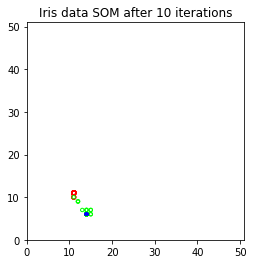

In [81]:
mapped = list(map(lambda zipped: (get_bmu(zipped[0], iris_som), zipped[1]), 
         zip(iris_dataset['data'], iris_dataset['target'])))


fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim((0, iris_som.shape[0]+1))
ax.set_ylim((0, iris_som.shape[1]+1))
ax.set_title('Iris data SOM after 10 iterations')

color_size_dict = {
    0: {
        'color': [1, 0, 0], 
        'size': 0.5
    },
    1: {
        'color': [0, 1, 0], 
        'size': 0.4
    },
    2: {
        'color': [0, 0, 1], 
        'size': 0.3
    }
}

for s, label in mapped:
    ax.add_patch(patches.Circle((s[0], s[1]), color_size_dict[label]['size'],
                         facecolor='none',
                         edgecolor=color_size_dict[label]['color']))
    
plt.show()
